## k-NearestNeighbor(k-최근접이웃) 알고리즘

 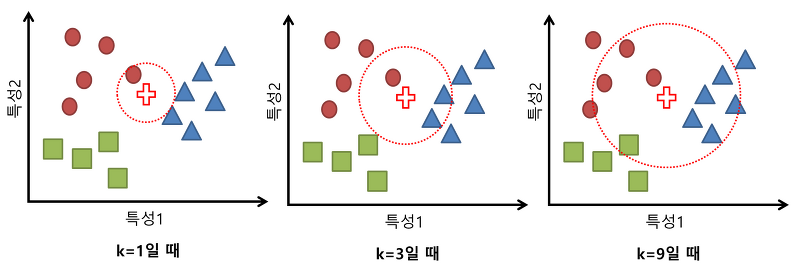

#붓꽃데이터 분류
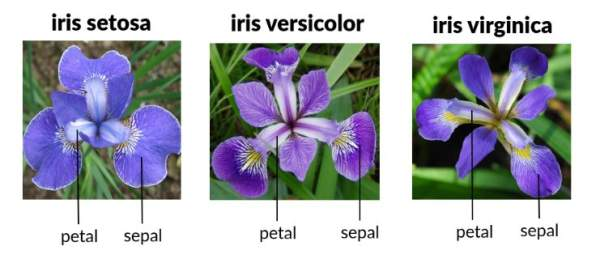

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 준비

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
iris = pd.read_csv('/content/drive/My Drive/2022_Mobile_AI_AIHUB/iris.csv')

## Data와 Target분리

## Dataframe을 Numpy ndarray로 변환

## Train, Test용 데이터분리 

## 표준화

# k-최근접 이웃 다중분류